In [29]:
from datasets import rm_black
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np

from PIL import Image, ImageChops

In [30]:
dir_path='/nfshome/xueqin/udalearn/gaze_estimation/data/MPIIFaceGaze/p00/day01/0030.jpg'

In [31]:
# rm_black.rmBlackBorder(dir_path)

In [32]:
image_data = tf.gfile.FastGFile(dir_path, 'rb').read()

In [43]:
def rm_black(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0, 0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

In [44]:
type(image_data)

bytes

<class 'PIL.Image.Image'>


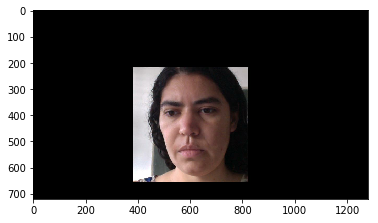

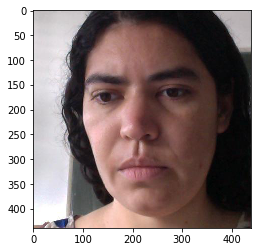

In [46]:
image_raw_data_jpg = tf.gfile.FastGFile(dir_path, 'rb').read()   
  
with tf.Session() as sess:  
    
    img_data_jpg = tf.image.decode_jpeg(image_raw_data_jpg) #图像解码  
    img_data_jpg = tf.image.convert_image_dtype(img_data_jpg, dtype=tf.uint8) #改变图像数据的类型  
    
    im=Image.open(dir_path)
    im_crop = rm_black(im)
    #rm = rm_black.rmBlackBorder(lena, 20., 100., 2.)
    
    #print(type(lena))
    plt.figure(1) #图像显示  
    plt.imshow(img_data_jpg.eval()) 
    plt.figure(2)
    print(type(im_crop))
    plt.imshow(im_crop)
    plt.show() 